In [26]:
# Importar las lbrerias a utilizar: pandas (almacenar y analizar), numpy (operaciones númericas) y matplotlib.pyplot (graficos)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Cargar datos a analizar
file_a = pd.read_csv('world-happiness-report.csv')
file_b = pd.read_csv('world-happiness-report-2021.csv')

In [28]:
# Crear dataframe df_a
df_a = pd.DataFrame(file_a)
df_a.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275


In [29]:
# Crear dataframe df_b
df_b = pd.DataFrame(file_b)
df_b.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


In [30]:
# Crear la columna Year en el df_b ya que no la contienen porque todos los datos pertenecen al mismo año (2021)
df_b["Year"] = 2021
df_b.Year.head(3)


0    2021
1    2021
2    2021
Name: Year, dtype: int64

In [31]:
# Renombrar las columnas de df_a
df_a = df_a.rename(columns = {'Country name' : 'Country'})
df_a = df_a.rename(columns = {'year' : 'Year'})
df_a = df_a.rename(columns = {'Life Ladder' : 'Ladder score'})
df_a = df_a.rename(columns = {'Healthy life expectancy at birth' : 'Healthy life expectancy'})
df_a = df_a.rename(columns = {'Log GDP per capita' : 'GDP'})
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1949 non-null   object 
 1   Year                          1949 non-null   int64  
 2   Ladder score                  1949 non-null   float64
 3   GDP                           1913 non-null   float64
 4   Social support                1936 non-null   float64
 5   Healthy life expectancy       1894 non-null   float64
 6   Freedom to make life choices  1917 non-null   float64
 7   Generosity                    1860 non-null   float64
 8   Perceptions of corruption     1839 non-null   float64
 9   Positive affect               1927 non-null   float64
 10  Negative affect               1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [32]:
# Renombrar las columnas de df_b
df_b = df_b.rename(columns = {'Country name' : 'Country'})
df_b = df_b.rename(columns = {'Regional indicator' : 'Continent'})
df_b= df_b.rename(columns = {'Logged GDP per capita' : 'GDP'})

df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     149 non-null    object 
 1   Continent                                   149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   GDP                                         149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [33]:
# Convertir los nombres de las columnas a minúsculas en ambos DataFrames
df_a.columns = df_a.columns.str.lower()
df_b.columns = df_b.columns.str.lower()

# Concatenar ambos DataFrames, ignorando los índices existentes y creando uno nuevo
df_principal= pd.concat([df_a, df_b], ignore_index=True)

# Eliminar las filas duplicadas en el nuevo DataFrame
df_principal = df_principal.drop_duplicates()

# Convertir los nombres de las columnas a mayúsculas iniciales (capitalize)
df_principal.columns = [col.capitalize() for col in df_principal.columns]

# Reiniciar los índices del DataFrame resultante y eliminar los índices anteriores
df_principal = df_principal.reset_index(drop=True)
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     2098 non-null   object 
 1   Year                                        2098 non-null   int64  
 2   Ladder score                                2098 non-null   float64
 3   Gdp                                         2062 non-null   float64
 4   Social support                              2085 non-null   float64
 5   Healthy life expectancy                     2043 non-null   float64
 6   Freedom to make life choices                2066 non-null   float64
 7   Generosity                                  2009 non-null   float64
 8   Perceptions of corruption                   1988 non-null   float64
 9   Positive affect                             1927 non-null   float64
 10  Negative aff

1. ¿Cuál es el país más "feliz" del 2021 segun el data? (Considerar que la columna "Ladder score", mayor número, más feliz es el país)

In [34]:
# Filtrar el DataFrame 'df_principal' para obtener las filas donde la columna 'Year' es igual a 2021
year_2021 = df_principal[df_principal['Year'] == 2021]

# Encontrar el país más feliz (la fila con el valor más alto en 'Ladder score') en el DataFrame filtrado 'year_2021'
happiest_country_2021 = year_2021.nlargest(1, 'Ladder score')

happiest_country_2021

,Country,Year,Ladder score,Gdp,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Upperwhisker,Lowerwhisker,Ladder score in dystopia,Explained by: log gdp per capita,Explained by: social support,Explained by: healthy life expectancy,Explained by: freedom to make life choices,Explained by: generosity,Explained by: perceptions of corruption,Dystopia + residual
1949,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,NaN,...,7.904,7.78,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


2. ¿Cuál es el país mas "feliz" del 2021 por continente segun el data?

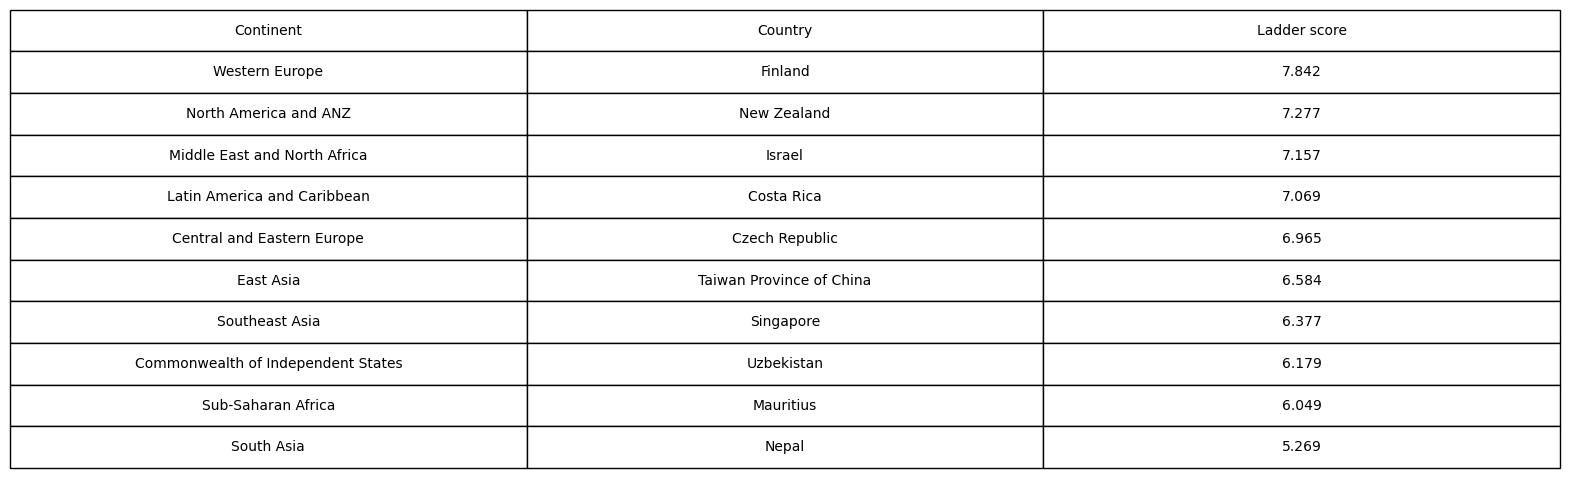

In [35]:

# Filtrar el DataFrame 'df_principal' para obtener las filas donde la columna 'Year' es igual a 2021
year_2021 = df_principal[df_principal['Year'] == 2021]

# Agrupar los datos por la columna 'Continent' y encontrar el país más feliz en cada continente para el año 2021
happiest_by_continent_2021 = year_2021.groupby('Continent', group_keys=False).apply(lambda x: x.nlargest(1, 'Ladder score'))

# Seleccionar las columnas relevantes y ordenar el DataFrame por el 'Ladder score' en orden descendente
happiest_by_continent_2021 = happiest_by_continent_2021[['Continent', 'Country', 'Ladder score']].sort_values(by='Ladder score', ascending=False)

# Crear una tabla con los datos de 'happiest_by_continent_2021' y personalizar su apariencia
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=happiest_by_continent_2021.values,
                 colLabels=happiest_by_continent_2021.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.5, 2.5)

# Guardar la figura como una imagen y mostrarla
plt.savefig('tabla_resultados_continent.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

3. ¿Cuál es el país que más veces ocupó el primer lugar todos los años?

In [36]:
# Agrupar el DataFrame 'df_principal' por año y encontrar el país con el 'Ladder score' máximo para cada año
top_countries_by_year = df_principal.groupby('Year').apply(lambda x: x.loc[x['Ladder score'].idxmax()])

# Contar la cantidad de veces que cada país aparece como el país con el 'Ladder score' máximo a lo largo de los años
first_place_counts = top_countries_by_year.groupby('Country').size()

# Encontrar el país que más veces ocupó el primer lugar
most_frequent_top_country = first_place_counts.idxmax()

# Encontrar la cantidad de veces que el país más frecuente ocupó el primer lugar
most_frequent_top_country_count = first_place_counts.max()

print(f"País que más veces ocupó el primer lugar: {most_frequent_top_country}")
print(f"Cantidad de veces: {most_frequent_top_country_count}")

País que más veces ocupó el primer lugar: Denmark
Cantidad de veces: 7


4. ¿Qué puesto de Felicidad tiene el país con mayor GDP del 2020?

In [37]:
# Filtrar el DataFrame 'df_principal' para obtener solo las filas correspondientes al año 2020
df_2020 = df_principal[df_principal['Year'] == 2020]

# Encontrar el país con el GDP en el año 2020
country_with_max_gdp = df_2020.loc[df_2020['Gdp'].idxmax(), 'Country']

# Encontrar la posición en el ranking de felicidad (Ladder score) del país con el máximo GDP en 2020
happiness_rank_of_max_gdp = df_2020[df_2020['Country'] == country_with_max_gdp]['Ladder score'].values[0]

print(f"El país con el mayor GDP en 2020 es {country_with_max_gdp}.")
print(f"Su indice de Felicidad es {happiness_rank_of_max_gdp}.")


El país con el mayor GDP en 2020 es Ireland.
Su indice de Felicidad es 7.035.


5. ¿En que porcentaje a variado a nivel mundial el GDP promedio del 2020 respecto al 2021? ¿Aumentó o disminuyo?

In [38]:
# Filtra el DataFrame 'df_principal' para obtener solo las filas correspondientes al año 2020 y 2021
df_2020 = df_principal[df_principal['Year'] == 2020]
df_2021 = df_principal[df_principal['Year'] == 2021]

# Calcular el promedio del GDP para el año 2020 y 2021
gdp_mean_2020 = df_2020['Gdp'].mean()
gdp_mean_2021 = df_2021['Gdp'].mean()

# Calcular el porcentaje de cambio entre los promedios de GDP de 2021 y 2020
percentage_change = ((gdp_mean_2021 - gdp_mean_2020) / gdp_mean_2020) * 100

# Determinar si el cambio fue un aumento o una disminución y asigna el resultado a la variable 'change_status'
change_status = "aumentó" if percentage_change > 0 else "disminuyó"

print(f"El GDP promedio a nivel mundial varió en un {abs(percentage_change):.2f}% desde 2020 hasta 2021.")
print(f"El GDP {change_status}.")


El GDP promedio a nivel mundial varió en un 3.27% desde 2020 hasta 2021.
El GDP disminuyó.


6. ¿Cuál es el pais con mayor esperanza de vida saludable ("Healthy life expectancy")?

In [39]:
# Filtrar el DataFrame 'df_principal' para obtener solo las filas correspondientes al año 2021
df_2021 = df_principal[df_principal['Year'] == 2021]

# Encuentrar el país con la mayor expectativa de vida saludable (HLE) en el año 2021
country_with_max_hle = df_2021.loc[df_2021['Healthy life expectancy'].idxmax(), 'Country']

# Obtener el valor de la expectativa de vida saludable para el país con el máximo HLE en 2021
max_hle_value = df_2021.loc[df_2021['Country'] == country_with_max_hle, 'Healthy life expectancy'].values[0]

print(f"El país con la mayor expectativa de vida saludable en 2021 es {country_with_max_hle}.")
print(f"Su valor de expectativa de vida saludable es {max_hle_value}.")


El país con la mayor expectativa de vida saludable en 2021 es Singapore.
Su valor de expectativa de vida saludable es 76.953.


¿Y cuanto tenia en ese indicador en el 2019?

In [40]:
# Filtrar el DataFrame 'df_principal' para obtener las filas correspondientes a Singapur en el año 2019
singapore_2019 = df_principal[(df_principal['Country'] == 'Singapore') & (df_principal['Year'] == 2019)]

# Verificar si hay datos disponibles para Singapur en 2019
if not singapore_2019.empty:
    valor_singapur_2019 = singapore_2019['Healthy life expectancy'].values[0]
    print(f"El valor que tenía Singapur en 2019 en expectativa de vida saludable es: {valor_singapur_2019}")

# Si no hay datos, imprimir un mensaje indicando que no hay datos disponibles para Singapur en 2019
else:
    print("No hay datos disponibles para Singapur en 2019.")

El valor que tenía Singapur en 2019 en expectativa de vida saludable es: 77.1
